# Sharpe Ratio
### Using yfinance data downloader
### %matplotlib notebook for Jupyter interactive chart plotting

- yfinance
- pandas
- matplotlib

Indicators:
- ave return
- standard deviation
- sharpe ratio

In [2]:
!pip install yfinance

  Using cached yfinance-0.1.63.tar.gz (26 kB)
  Using cached multitasking-0.0.9.tar.gz (8.1 kB)
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23914 sha256=355852962a240e5fa876c4eb7e696a93124a1ca1269301039a73b5d981436dfe
  Stored in directory: c:\users\cjlim\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8372 sha256=45d801a599369e2fc12f151d3b9512fefc782b22e926f816d6eddce6fc623ee3
  Stored in directory: c:\users\cjlim\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
timeperiod=365

df = yf.Ticker("BA").history(start="2015-01-01", end="2021-07-20", interval="1d").reset_index()[["Date","Open"]]

<IPython.core.display.Javascript object>


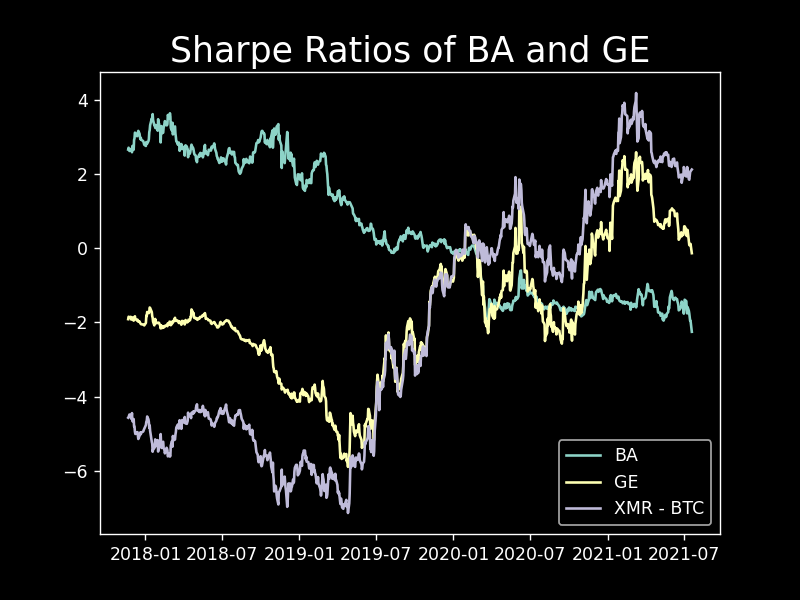

In [8]:
df = df.rename(columns = {"Open":"ba"})
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
gedata = yf.Ticker("GE").history(start="2015-01-01", end="2021-07-20", interval="1d").reset_index()[["Date","Open"]]
gedata = gedata.rename(columns = {"Open":"ge"})
gedata["Date"] = pd.to_datetime(gedata["Date"])

In [ ]:
df = df.merge(gedata, on="Date", how="left")

In [ ]:
df["baret"] = 100 *(df["ba"]/df["ba"].shift(timeperiod) -1)
df["geret"] = 100 *(df["ge"]/df["ge"].shift(timeperiod) -1)

In [ ]:
df["bastd"] = df["baret"].rolling(timeperiod).std()
df["gestd"] = df["geret"].rolling(timeperiod).std()

In [ ]:
df["basharpe"] = df["baret"]/df["bastd"]
df["gesharpe"] = df["geret"]/df["gestd"]

In [ ]:
plt.style.use("dark_background")

plt.plot(df["Date"],df["basharpe"], label="BA")
plt.plot(df["Date"],df["gesharpe"], label="GE")
plt.plot(df["Date"],df["gesharpe"] - df["basharpe"], label="XMR - BTC")
plt.title("Sharpe Ratios of BA and GE", size = 20)
plt.legend()
plt.show()